In [43]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import plot_confusion_matrix
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns


df = pd.read_csv('post-operative-data.xls', sep= ",")
df = df[df['COMFORT'] != "?"]
print(df)



   L-CORE L-SURF       L-O2  L-BP SURF-STBL CORE-STBL     BP-STBL COMFORT  \
0     mid    low  excellent   mid    stable    stable      stable      15   
1     mid   high  excellent  high    stable    stable      stable      10   
2    high    low  excellent  high    stable    stable  mod-stable      10   
3     mid    low       good  high    stable  unstable  mod-stable      15   
4     mid    mid  excellent  high    stable    stable      stable      10   
..    ...    ...        ...   ...       ...       ...         ...     ...   
85    mid    mid  excellent   mid  unstable    stable      stable      10   
86    mid    mid  excellent   mid  unstable    stable      stable      15   
87    mid    mid       good   mid  unstable    stable      stable      15   
88    mid    mid  excellent   mid  unstable    stable      stable      10   
89    mid    mid       good   mid  unstable    stable      stable      15   

   decision ADM-DECS  
0                  A  
1                  S  
2     

In [44]:
num_mapper = {"low":1, "mid":2, "high":3}
df["L-CORE_Num"] = df["L-CORE"].replace(num_mapper)
df["L-SURF_Num"] = df["L-SURF"].replace(num_mapper)
df["L-BP_Num"] = df["L-BP"].replace(num_mapper)


num_mapper1 = {"good":3, "excellent":4}
df["L-O2_Num"] = df["L-O2"].replace(num_mapper1)

num_mapper2 = {"stable":2, "mod-stable":1, "unstable":0}
df["SURF-STBL_Num"] = df["SURF-STBL"].replace(num_mapper2)
df["CORE-STBL_Num"] = df["CORE-STBL"].replace(num_mapper2)
df["BP-STBL_Num"] = df["BP-STBL"].replace(num_mapper2)

num_mapper3 = {"I":0, "A":1, "S":2}
df["decision ADM-DECS_Num"] = df["decision ADM-DECS"].replace(num_mapper3)


df = df.drop(['L-CORE', 'L-SURF', "L-BP", "L-O2", "SURF-STBL", "CORE-STBL", "BP-STBL"], axis=1)
print(df)





   COMFORT decision ADM-DECS  L-CORE_Num  L-SURF_Num  L-BP_Num  L-O2_Num  \
0       15                 A           2           1         2         4   
1       10                 S           2           3         3         4   
2       10                 A           3           1         3         4   
3       15                A            2           1         3         3   
4       10                 A           2           2         3         4   
..     ...               ...         ...         ...       ...       ...   
85      10                 A           2           2         2         4   
86      15                 S           2           2         2         4   
87      15                 A           2           2         2         3   
88      10                 A           2           2         2         4   
89      15                 S           2           2         2         3   

    SURF-STBL_Num  CORE-STBL_Num  BP-STBL_Num decision ADM-DECS_Num  
0               2

0.7777777777777778
0.40996168582375475


C:\Users\emren\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


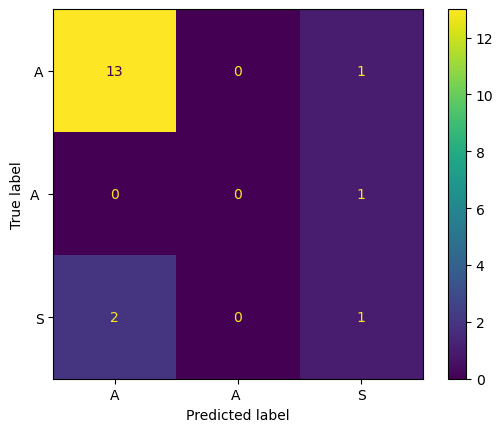

0.7777777777777778
0.2916666666666667


C:\Users\emren\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


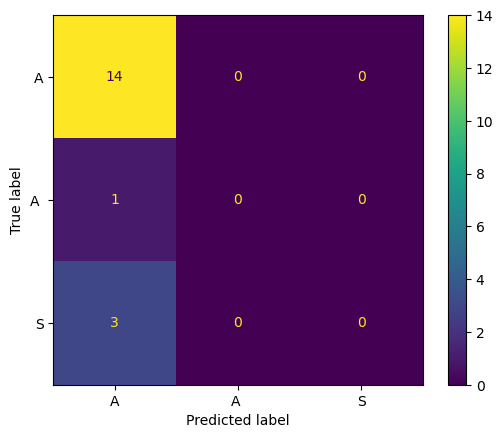

0.7777777777777778
0.4222222222222222


C:\Users\emren\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


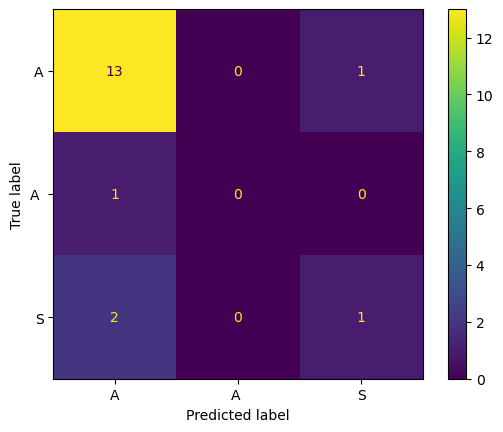

0.8333333333333334
0.4444444444444445


C:\Users\emren\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


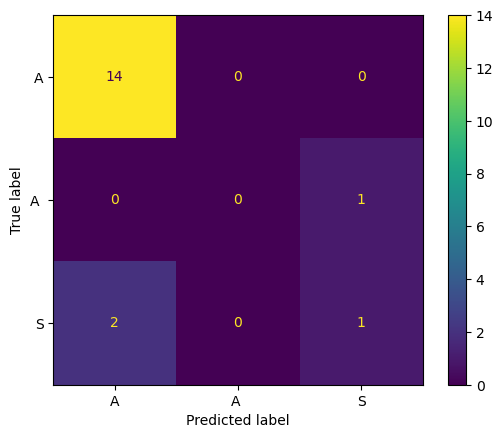

0.7222222222222222
0.2795698924731183


C:\Users\emren\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\emren\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

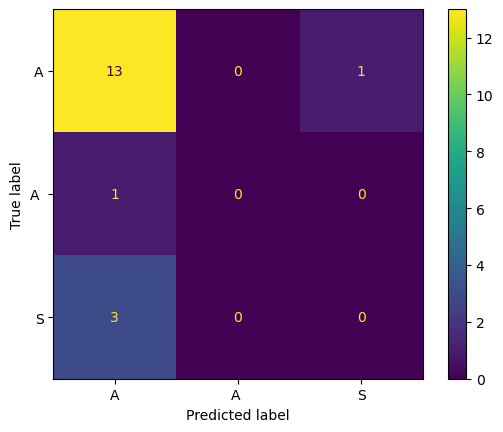

In [49]:

X = df[['L-CORE_Num', 'L-SURF_Num', 'L-BP_Num', "L-O2_Num", "SURF-STBL_Num", "CORE-STBL_Num", "BP-STBL_Num", "COMFORT" ]]
y = df['decision ADM-DECS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1997)

modelDTC = tree.DecisionTreeClassifier(random_state=1997)
modelDTC.fit(X_train, y_train)
y_predDTC = modelDTC.predict(X_test)
print(modelDTC.score(X_test, y_test))
print((f1_score(y_test, y_predDTC, average='macro')))
cmDTC = confusion_matrix(y_test, y_predDTC)
plot_confusion_matrix(modelDTC, X_test, y_test)
plt.show()

modelSVC = SVC(random_state=1997)
modelSVC.fit(X_train, y_train)
y_predSVC = modelSVC.predict(X_test)
print(modelSVC.score(X_test, y_test))
print(f1_score(y_test, y_predSVC, average='macro'))
cmSVC = confusion_matrix(y_test, y_predSVC)
plot_confusion_matrix(modelSVC, X_test, y_test)
plt.show()


modelRFC = RandomForestClassifier(random_state=1997)
modelRFC.fit(X_train, y_train)
y_predRFC = modelRFC.predict(X_test)
print(modelRFC.score(X_test, y_test))
print(f1_score(y_test, y_predRFC, average='macro'))
cmRFC = confusion_matrix(y_test, y_predRFC)
plot_confusion_matrix(modelRFC, X_test, y_test)
plt.show()


modelGNB = GaussianNB()
modelGNB.fit(X_train, y_train)
y_predGNB = modelGNB.predict(X_test)
print(modelGNB.score(X_test, y_test))
print(f1_score(y_test, y_predGNB, average='macro'))
cmGNB = confusion_matrix(y_test, y_predGNB)
plot_confusion_matrix(modelGNB, X_test, y_test)
plt.show()


modelKNN = KNeighborsClassifier(n_neighbors = 7)
modelKNN.fit(X_train, y_train)
y_predKNN = modelKNN.predict(X_test)
print(modelKNN.score(X_test, y_test))
print(f1_score(y_test, y_predKNN, average='macro'))
cmKNN = confusion_matrix(y_test, y_predKNN)
plot_confusion_matrix(modelKNN, X_test, y_test)
plt.show()

